In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("failure.csv")

In [39]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [41]:
X = df.drop(columns=["date", "device", "failure"])
y = df["failure"]

In [43]:
y.value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

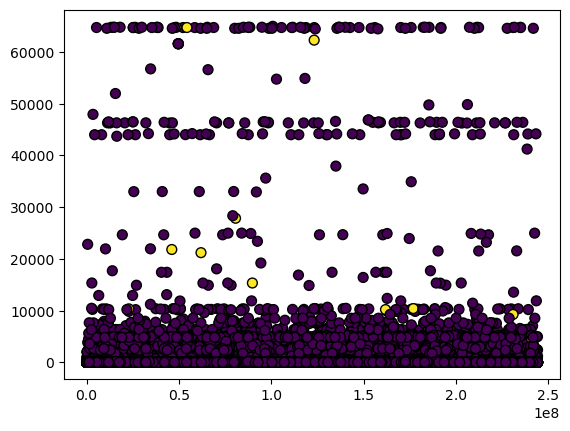

In [45]:
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], marker="o", c=y, s=50, edgecolor="k")

In [51]:
model = DecisionTreeClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

result_before = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)

np.mean(result_before)

0.5181471935464583

In [49]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [29]:
y_resampled.value_counts()

failure
0    124388
1    124388
Name: count, dtype: int64

In [31]:
model = DecisionTreeClassifier(random_state=42)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

result = cross_val_score(model, X_resampled, y_resampled, scoring="roc_auc", cv=cv, n_jobs=-1)

np.mean(result)

0.9977516590658505